 - Fundamental, S03 노드를 진행하다가 `cumsum()`이라는 메소드를 만났다.
 이 메소드는 `numpy`에 있는 메소드로서, 주어진 np.array에 대하여 cummulative sum을 출력하는 함수이다.
 - 이 메소드는 `np.random.randn` 함수와 같이 쓰였다.
 - 그러던 중, `matplotlib`으로 `plt.plot(np.random.randn(40).cumsum())`와 `plt.plot(np.random.randn(40))`의 그래프를 각각 그려봤는데, 그 형태가 너무나도 달랐다.
 - 그래서 이것과 관련하여 적기 시작했다.

# 1. 모집단과 평균

어떤 확률변수 $X$가 집합 $A$ 안에서 어떤 확률분포를 이루고 있다고 하자.
이 확률변수 $X$의 평균을 $m$, 표준편차를 $\sigma$라고 하자.
\begin{align*}
\mathbb E(X)&=m\\
\sigma(X)&=\sigma
\end{align*}
이 확률분포에서 임의로 $n$개의 숫자를 추출하여 그 값을 $X_1$, $\cdots$, $X_n$이라고 하면, 각각의 $X_i$들은 그 자체로 확률변수가 된다.
그리고 이 확률변수들 각각은 평균이 $m$이고 표준편차가 $\sigma$가 될 것이다.
$$\begin{aligned}
\mathbb E(X_i)&=m\\
\sigma(X_i)&=\sigma
\end{aligned},\qquad(i=1,\cdots,n)$$
이때, 원래의 집합 $A$를 **모집단**이라고 하고, $n$개의 확률변수로 이루어진 집합 $\{X_1,\cdots,X_n\}$을 **표본**이라고 한다.

이 확률변수들의 평균인
$$\overline X = \frac{X_1+\cdots+X_n}n$$
을 **표본평균**이라고 부른다.
이 표본평균 또한 확률변수이므로, 평균과 표준편차를 계산할 수 있는데

\begin{align*}
\mathbb E(\overline X)&=m\\
\sigma(\overline X)&=\frac\sigma{\sqrt n}
\end{align*}
인 것이 알려져있다.

# 2. `np.random.rand()`

In [4]:
import numpy as np

In [28]:
a = np.random.rand()
print(a)
b = np.random.rand(2)
print(b)

0.6686498790041653
[0.00858698 0.99482268]


`np.random.rand()`는 $[0,1]$의 균등분포(uniform distribution)에서 하나의 숫자를 임의로 추출한다.
즉, 모집단은 $A=[0,1]$이고 이 모집단은 확률밀도함수
$$f(x)=1\quad(0\le x\le 1)$$
를 가지는 확률분포를 따르고 있다.
이 확률분포에서 추출한 하나의 숫자를 $X$라고 하면 $X$의 평균은
이 모집단의 평균은
$$\mathbb E(X)=\int_0^1xf(x)\,dx=\int_0^1x\,dx=\frac12$$
이고, 분산은
$$\mathbb V(X)=\int_0^1x^2f(x)\,dx=\int_0^1x^2\,dx=\frac13$$
이며, 표준편차는
$$\sigma(X)=\sqrt{\frac13}$$
이다.

`np.random.rand(n)`은 모집단에서 $n$개의 숫자를 임의추출한다.
각각의 숫자들을 $X_1$, $\cdots$, $X_n$이라고 하면
$[X_1,\cdots,X_n]$ 형태의 리스트를 출력하는 셈이다.

# 3. `np.cumsum()`

In [31]:
L = np.array([1,2,3])
L.cumsum()

array([1, 3, 6])

이 함수는 `np.array` 형태의 `[1, 2, 3]`을 `[1, 1+2, 1+2+3]`을 출력한다.
그러니까, `np.random.randn(n).cumsum()`은
$[X_1,\:\:X_1+X_2,\:\:\cdots,\:\:X_1+\cdots+X_n]$

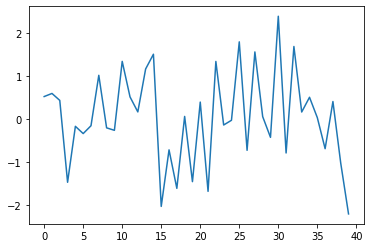

In [35]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(40))

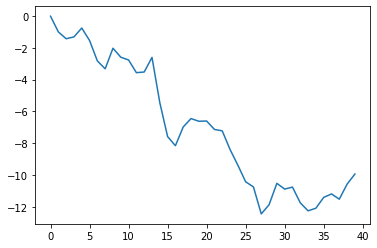

In [36]:
plt.plot(np.random.randn(40).cumsum())

위의 그래프, 즉, 수열 $\left\{X_1,\cdots,X_n\right\}$에 대한 그래프와
아래 그래프, 즉, 수열 $\left\{X_1,\:\:X_1+X_2,\:\:\cdots,\:\:X_1+\cdots+X_n\right\}$에 대한 그래프가 굉장히 다르게 생겼다.
왜 이렇게 다를까? 어떻게 다를까? 하는 질문떄문에 이 글을 쓰기 시작했다.

내가 생각한 둘 사이의 차이점은 다음과 같다.
 - 위의 그래프는 상당히 변동성이 커보인다.
 반면에 아래의 그래프는 상당히 '연속함수'의 그래프인 것처럼 보인다.
 그렇다고 위의 그래프가 불연속 함수의 그래프인 것은 아니지만, 여하튼 아래의 그래프가 조금 덜 움직이고, 안정적이다.
 위의 그래프는 굉장히 불안정한 모양이다.
 - 위의 그래프의 값들은 -2와 2 사이에 많이 몰려있다.
 하지만 아래의 그래프는 아래쪽에 많이 몰려있고, 더이상 올라오지 않는다.
 그리고 그 절댓값이 굉장히 크다(지금 보이는 바로는 12 정도)

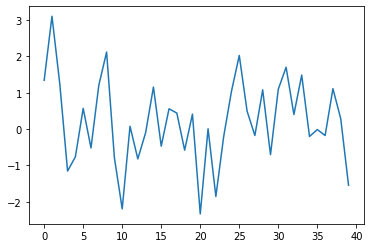

In [163]:
#np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다. 
#cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(40))

`np.random.randn(50)`을 통해 50개의 값 $X_1$, $\cdots$, $X_{50}$을 생성하되, 각각의 값 $X_i$는 정규분포 $N(0,1)$을 따른다.
아래 그림에서는 $\{X_i:i=1,2,3,\cdots,40\}$의 그래프를 보여주고 있다.
즉 $\{X_i:i=1,2,3,\cdots,40\}$는 하나의 수열이므로, $\{1,\cdots,40\}$를 정의역으로 하는 함수라고 생각할 수 있고, 따라서 그래프를 그릴 수 있는 것이다.

$S_n=X_1+X_2+\cdots+X_n$을 고려하면 위의 그림은 $\{S_n:n=1,2,3,\cdots,40\}$의 그래프를 나타내는 것이다. 이 두 그래프는 왜 다르게 나올까?

$\frac{S_n}n=\frac{X_1+\cdots+X_n}n=\overline X$는 표본 $\{X_i:i=1,\cdots,40\}$의 표본평균이다.
각각의 확률변수 $X_i$들이 동일하고 독립적인(i.i.d., independent and identically distributed) 분포를 따르므로, $\overline X$의 분포는 $N\left(E(X),\frac{V(X)}n\right)=N\left(0,\frac1n\right)$을 따른다.
그러면 $S_n=n\overline X$는 정규분포 $N\left(0,n\right)$을 따르게 된다.
이제 아래 코드를 보자.